In [1]:
%matplotlib notebook
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchdiffeq import odeint
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


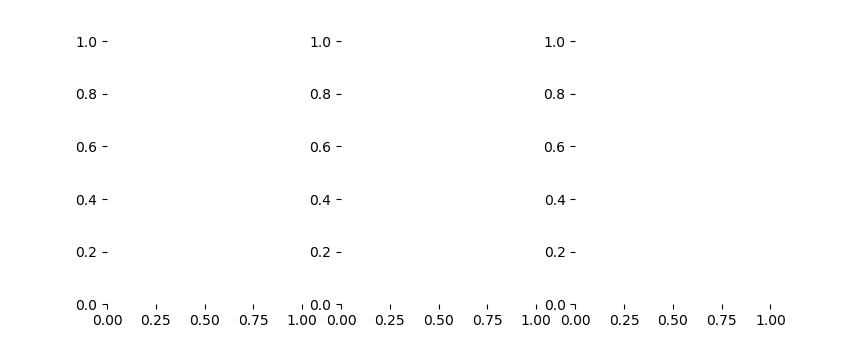

In [2]:
fig = plt.figure(figsize=(12, 4), facecolor='white')
ax_traj = fig.add_subplot(131, frameon=False)
ax_phase = fig.add_subplot(132, frameon=False)
ax_vecfield = fig.add_subplot(133, frameon=False)
plt.show(block=False)

In [5]:
true_y0 = torch.tensor([[2., 0.]])
t = torch.linspace(0., 25., 1000)
true_A = torch.tensor([[-0.1, 2.0], [-2.0, -0.1]])

In [6]:
class Lambda(nn.Module):

    def forward(self, t, y):
        return torch.mm(y**3, true_A)

In [7]:
with torch.no_grad():
    true_y = odeint(Lambda(), true_y0, t, method='dopri5')